In [1]:
import numpy as np
from matplotlib import pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.style.use('seaborn')

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

matplotlib.rcParams.update(nice_fonts)

In [2]:
listactions = list(range(6,98,5))
hists = []
hists_p = []
tl = []
ac = []
pre = []
for a in listactions:
    
    try:
        prec = np.load('./nsprec_%02d.npy'%a)
        h,_ = np.histogram(prec,np.linspace(0,1,10),range=[0,1])
        hists_p.append(h)
        pre.append(prec.T)
        ac.append(a)
    except:
        print('\rMissing...',end='')
        

In [3]:
pmean = np.mean(np.vstack(pre),axis=1)

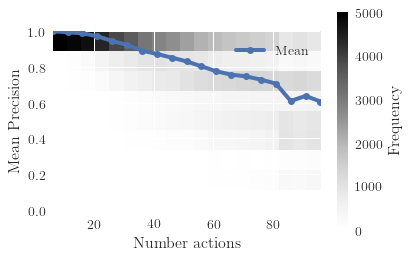

In [4]:
plt.imshow(np.vstack(hists_p).T,extent=(ac[0],ac[-1],0,1), aspect=60,origin='lower', interpolation='None')
plt.plot(ac,pmean,'-o',label='Mean',linewidth=4)
plt.colorbar(label='Frequency')
plt.xlabel('Number actions')
plt.ylabel('Mean Precision')
plt.legend()
plt.savefig('Scale_degradation_precision.pdf')
plt.show()